In [ ]:
#######################################################################

<div style="text-align: justify"> your-text-here </div>

# Correlation and Preambles
We will explore how nodes can listen for a specific preamble to achieve time synchronization.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import numpy
import random

### Problem 1.1: Slotted ALOHA Simulation
This function below will takes three parameters: the number of users, the number of time slots,
and the probability $p$ that a user will transmit in a slot and will return the fraction
of successful slots (slots where only one user transmitted) over the total number of slots

In [10]:
def simulate_aloha(n_users, n_timeslots, prob):
    successful_slots = 0

    for _ in range(n_timeslots):
        users_transmitting = 0
        for _ in range(n_users):
            if random.random() < prob:
                users_transmitting += 1
        if users_transmitting == 1:
            successful_slots += 1

    fraction_successful = successful_slots / n_timeslots
    return fraction_successful


### 1.2 Verifying Slotted ALOHA Capacity

Now in this section, we will simulate over 1000 values of $p$ between 0 and 1 with $n = 10$ users and $T = 10000$
timeslots:

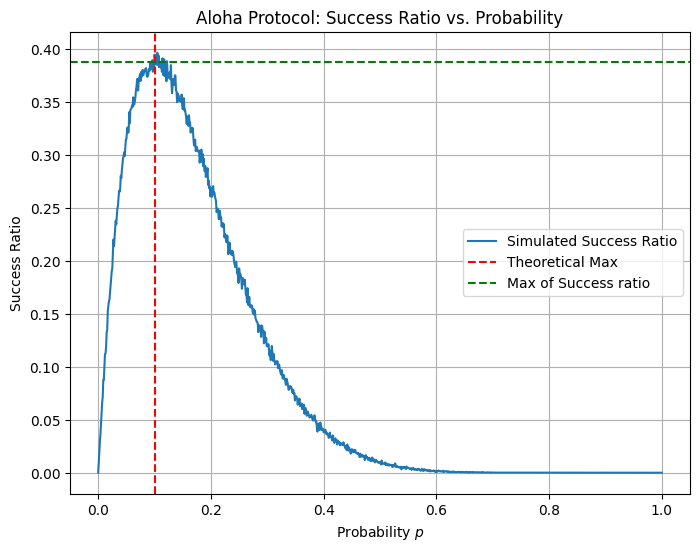

In [7]:
def simulate_aloha(n_users, n_timeslots, prob):
    successful_slots = 0

    for _ in range(n_timeslots):
        users_transmitting = 0
        for _ in range(n_users):
            if random.random() < prob:
                users_transmitting += 1
        if users_transmitting == 1:
            successful_slots += 1

    fraction_successful = successful_slots / n_timeslots
    return fraction_successful

n_users = 10
n_timeslots = 10000
R_max = ((1 - 1/n_users)**(n_users - 1)  )
prob_values = [i / 1000 for i in range(1001)]  # Values of p from 0 to 1 in steps of 0.001
success_ratios = []

for prob in prob_values:
    success_ratio = simulate_aloha(n_users, n_timeslots, prob)
    success_ratios.append(success_ratio)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(prob_values, success_ratios, label='Simulated Success Ratio')
plt.xlabel('Probability $p$')
plt.ylabel('Success Ratio')
plt.title('Aloha Protocol: Success Ratio vs. Probability')
plt.axvline(x=1/n_users, color='r', linestyle='--', label='Theoretical Max')
plt.axhline(y=R_max, color='g', linestyle='--', label='Max of Success ratio')
plt.legend()
plt.grid(True)
plt.show()

- The results abive can be explained and are in synch with what we are going to theoretcally prove. If $p=0$ then no one has a chance to success, therfore, the will be no non-zero success rate. As we gradually increas $p$, at first the success rate will rise, but there will come a point where increasing $p$ will no longer result in rise of the success rate. The more $p$ goes to 1, the more is the chance of nodes' success which will lead to the rise of the probability of more than one node succedding.

- Provided that each node's success is a Bernoulli with parameter $p$, we can easily see that each user's success (namely $X_k$) is clearly independant of others and moreover the whole number of success rate (namely $Y$) follows a Geometric distribution with parameter $np$, where $n$ is the nmber of all nodes, since $Y = \sum_{k=1}^{n} X_k$ where $X_k \sim Bernoulli (p)$. 

- The success rate $R$ be defined as $R = \mathbb{P_Y} (Y = 1) = {n \choose 1} p^1 (1-p)^{n-1}= n p (1-p)^{n-1}$. Differentiation with respect to $p$ will imply that:
 $p (1-p)^{n-1} - (n-1) p (1-p)^{n-2} = 0$ which suggest the maximum will take place at $p = \frac{1}{n} $ and the maximum value is $  ( 1 - \frac{1}{n})^{n-1}$
 which for large $n$'s will converge to $\frac{1}{e} = 0.3678$.

- As you can see above, the maximum of success rate took place at near $p=0.1$ which is in synch with what we have proven. Furthermore, if we leet $n=10$ then, $R_{max} = 0.0387420489$ whichis also in synch withwhat we observed in the code above.

### Problem 2.1: Autocorrelation 
The autocorrelation of a signal $x$ is the correlation of $x$ with itself. For a uniform random signal $x$ think about what the autocorrelation would look like.

- **Plot the signal and its autocorrelation. Use `numpy.correlate` with `mode='full'`, and plot the absolute value of the autocorrelation.**

In [15]:
X_len = 1000
X = np.random.random(X_len) + 1j * np.random.random(X_len)

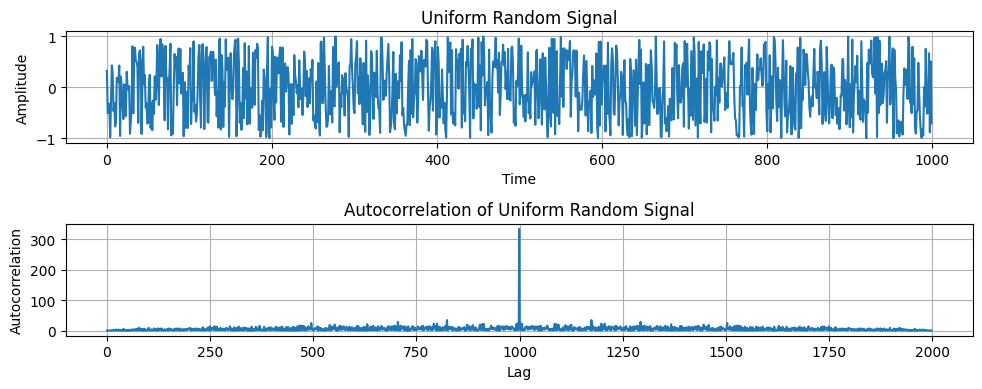

In [17]:

signal_length = 1000
uniform_signal = np.random.uniform(low=-1, high=1, size=signal_length)
autocorr = np.correlate(uniform_signal, uniform_signal, mode='full')

# Plot the signal
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(uniform_signal)
plt.title('Uniform Random Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(np.abs(autocorr))
plt.title('Autocorrelation of Uniform Random Signal')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.tight_layout()
plt.show()


### Problem 2.2: Preamble detection using correlation
Implement preamble detection and synchronization using the correlation.

- **Fill in the `detect_preamble` function below. The function should take two signals and return `None` if the preamble is not found, otherwise it should return the index where the preamble starts.**

In [24]:
# Compare the correlation magnitude against this value to determine whether there is a preamble or not
threshold = 0.99

def detect_preamble(preamble, signal):
    if len(signal) < len(preamble):
        print('invalid inputs: the length of preamble must be less than the main signal')
        return None
    corr_preamble_signal = np.abs(np.correlate(signal, preamble, mode='valid'))
    autocorr_preamble = np.abs(np.correlate(preamble, preamble, mode='valid'))
    if max(corr_preamble_signal) -  max(np.abs(autocorr_preamble)) * threshold>0:
        return np.argmax(corr_preamble_signal)
    return None


In [33]:
# This cell will test your implementation of `detect_preamble`
preamble_length = 100
signal_length = 1000
preamble = (numpy.random.random(preamble_length) + 1j * numpy.random.random(preamble_length))
signalA = numpy.random.random(signal_length) + 1j * numpy.random.random(signal_length)
signalB = numpy.random.random(signal_length) + 1j * numpy.random.random(signal_length)
preamble_start_idx = 123
signalB[preamble_start_idx:preamble_start_idx + preamble_length] += preamble

a = numpy.testing.assert_equal(detect_preamble(preamble, signalA), None)
print(detect_preamble(preamble, signalA))
b = numpy.testing.assert_equal(detect_preamble(preamble, signalB), preamble_start_idx)
print(detect_preamble(preamble, signalB))

None
123


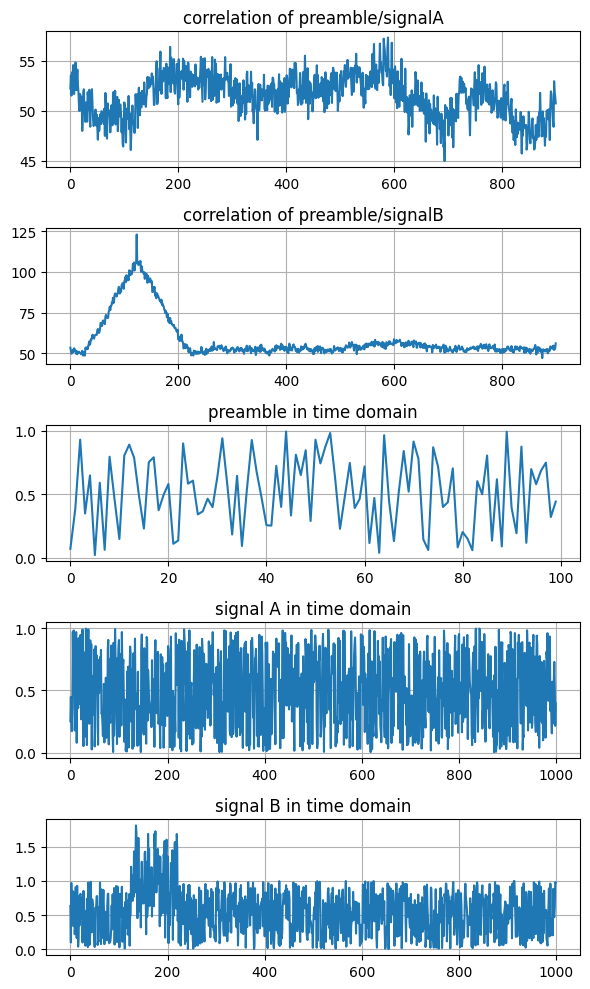

In [38]:
plt.figure(figsize=(6,10))
plt.subplot(5,1,1)
plt.plot(np.abs(np.correlate(signalA, preamble, mode='valid')))
plt.title('correlation of preamble/signalA')
plt.grid(True)
plt.subplot(5,1,2)
plt.plot(np.abs(np.correlate(signalB, preamble, mode='valid')))
plt.title('correlation of preamble/signalB')
plt.grid(True)
plt.subplot(5,1,3)
plt.plot(preamble)
plt.title('preamble in time domain')
plt.grid(True)
plt.subplot(5,1,4)
plt.plot(signalA)
plt.title('signal A in time domain')
plt.grid(True)
plt.subplot(5,1,5)
plt.plot(signalB)
plt.title('signal B in time domain')
plt.grid(True)
plt.tight_layout()
plt.show()


### Problem 3.1: Generating 16 bits for GPS randomly

In [3]:
import random

random.seed(400101204)  
prn_seq = [random.choice([0, 1]) for _ in range(16)]
print("Generated Sequence:", prn_seq)

Generated Sequence: [0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1]


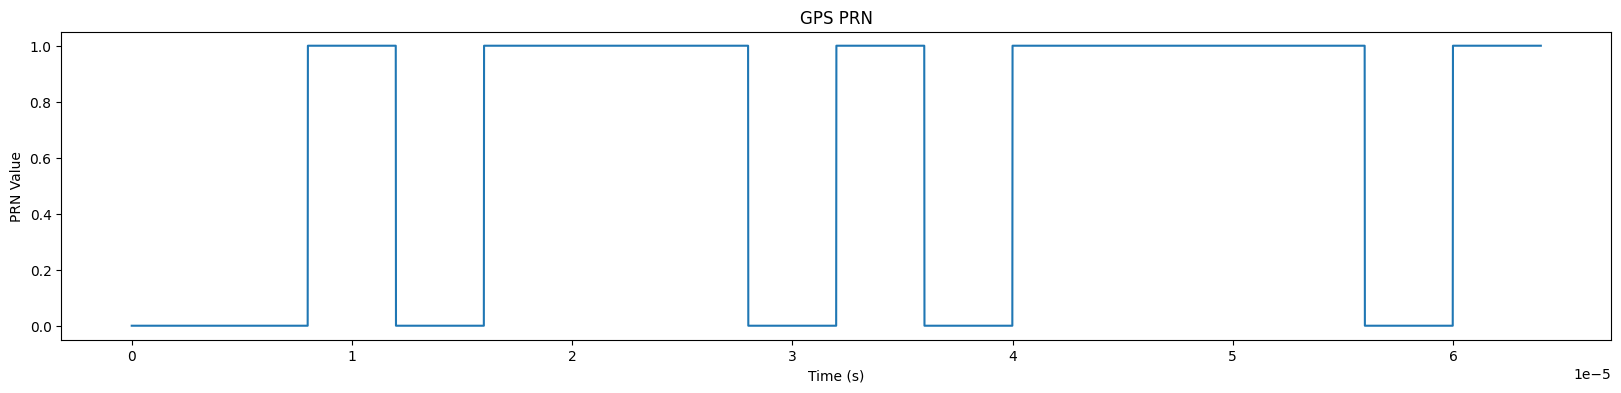

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# The chipping frequency
f_prn = 2.5e5

# Define the prn function using prn_seq
prn = lambda x: prn_seq[int(x*f_prn) % 16]

# Plotting
plt.figure(figsize=(20, 4))
time_values = np.arange(0, 16/f_prn, 1.0e-8)
prn_values = [prn(t) for t in time_values]

plt.plot(time_values, prn_values)
plt.title('GPS PRN')
plt.xlabel('Time (s)')
plt.ylabel('PRN Value')
plt.show()


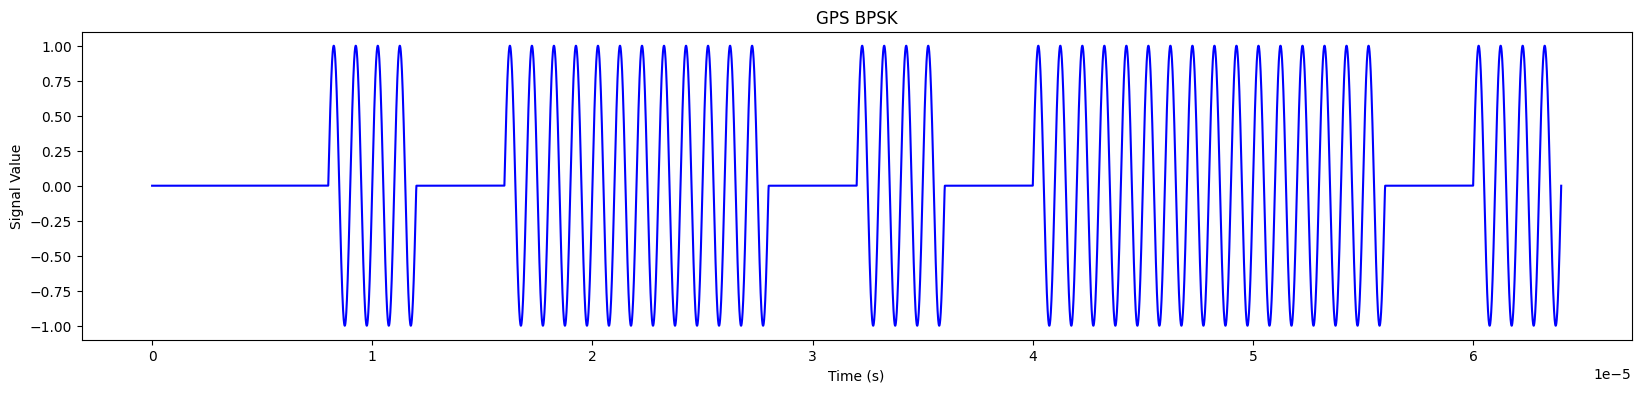

In [7]:
# The chipping frequency

f_prn = 2.5e5

# Define the prn function using prn_seq
prn = lambda x: prn_seq[int(x*f_prn) % 16]

# Define the carrier function as a simple sine wave
carrier = lambda x: np.sin(2 * np.pi * 1e6 * x)

# Define the signal as the product of carrier and prn
signal = lambda x: carrier(x) * prn(x)

plt.figure(figsize=(20, 4))
# Plotting using matplotlib
time_values = np.arange(0, 16/f_prn, 1.0e-11)
signal_values = [signal(t) for t in time_values]

plt.plot(time_values, signal_values, color='blue')
plt.title('GPS BPSK')
plt.xlabel('Time (s)')
plt.ylabel('Signal Value')
plt.show()

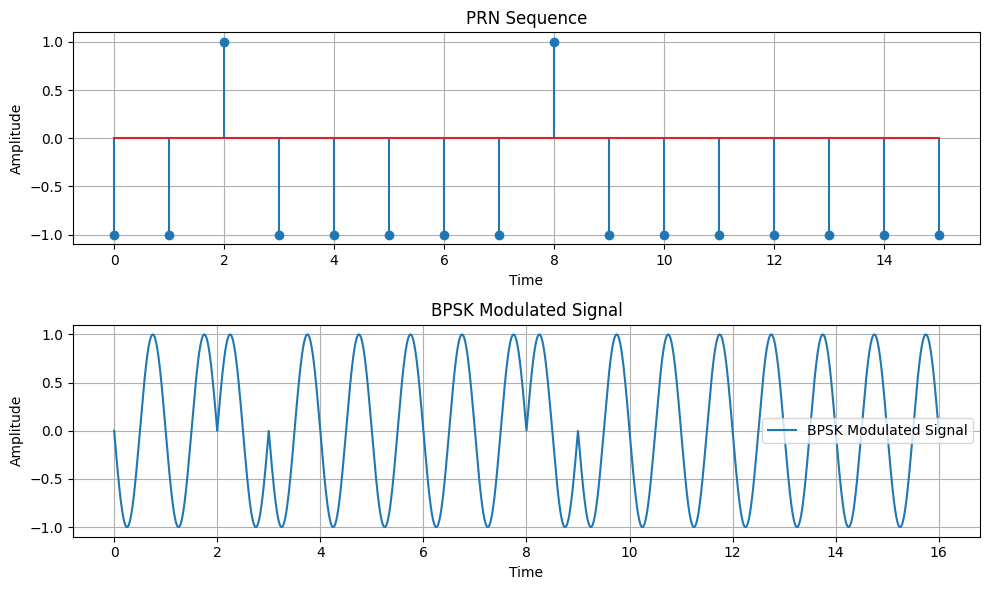

In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np

random.seed(42)  # Set the seed value to 42 (you can use any integer value)

sequence_size = 16
prn_sequence = [random.choice([-1, 1]) for _ in range(sequence_size)]  # Creating PRN sequence with -1 and 1

# Creating time values for plotting
N = 1000 * sequence_size
t = np.linspace(0, sequence_size, N)
dt = t[2] - t[1]
# Generating carrier wave (sine wave)
f_c = 1  # Frequency of the carrier wave
carrier_wave = np.sin(2 * np.pi * f_c * t)

# Modulating carrier wave using PRN sequence
modulated_signal = np.array([])
for bit in prn_sequence:
    modulated_signal = np.append(modulated_signal, np.ones(1000) * bit)

signal =  carrier_wave * modulated_signal

# Plotting PRN sequence and modulated signal
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title('PRN Sequence')
plt.stem(np.arange(sequence_size), prn_sequence)#, use_line_collection=True
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('BPSK Modulated Signal')
plt.plot(t, carrier_wave * modulated_signal, label='BPSK Modulated Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


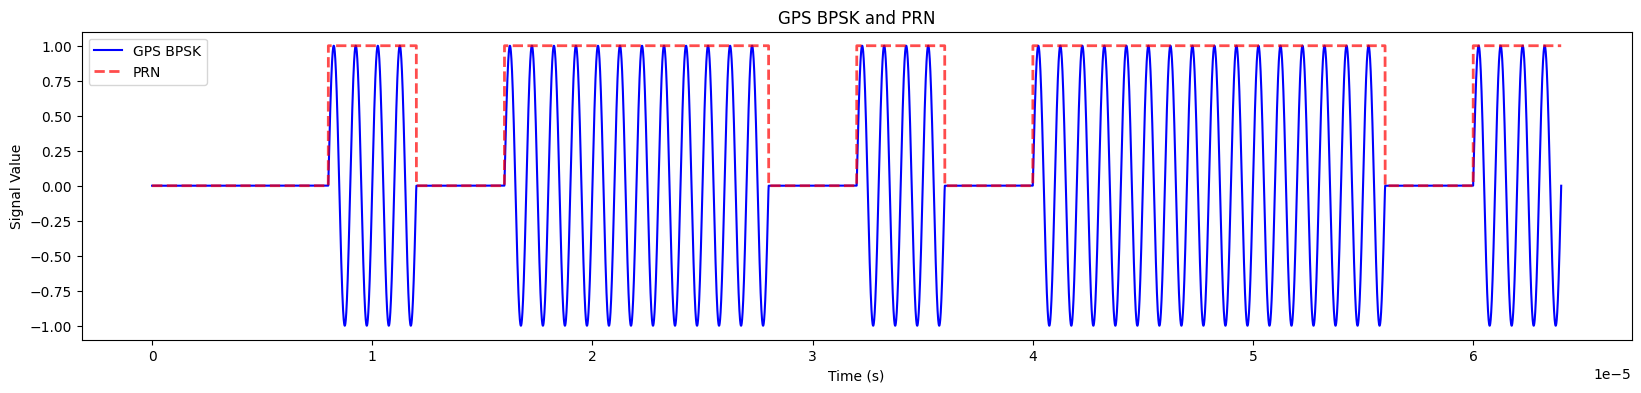

In [10]:

# Define the prn function using prn_seq
prn = lambda x: prn_seq[int(x*f_prn) % 16]

# Define the carrier function as a simple sine wave
carrier = lambda x: np.sin(2 * np.pi * 1e6 * x)

# Define the signal as the product of carrier and prn
signal = lambda x: carrier(x) * prn(x)

# Plotting
plt.figure(figsize=(20, 4))
time_values = np.arange(0, 16/f_prn, 1.0e-11)
signal_values = [signal(t) for t in time_values]
prn_values = [prn(t) for t in time_values]

plt.plot(time_values, signal_values, color='blue', label='GPS BPSK')
plt.plot(time_values, prn_values, color='red', linestyle='--', linewidth=2, alpha=0.7, label='PRN')
plt.title('GPS BPSK and PRN')
plt.xlabel('Time (s)')
plt.ylabel('Signal Value')
plt.legend()
plt.show()

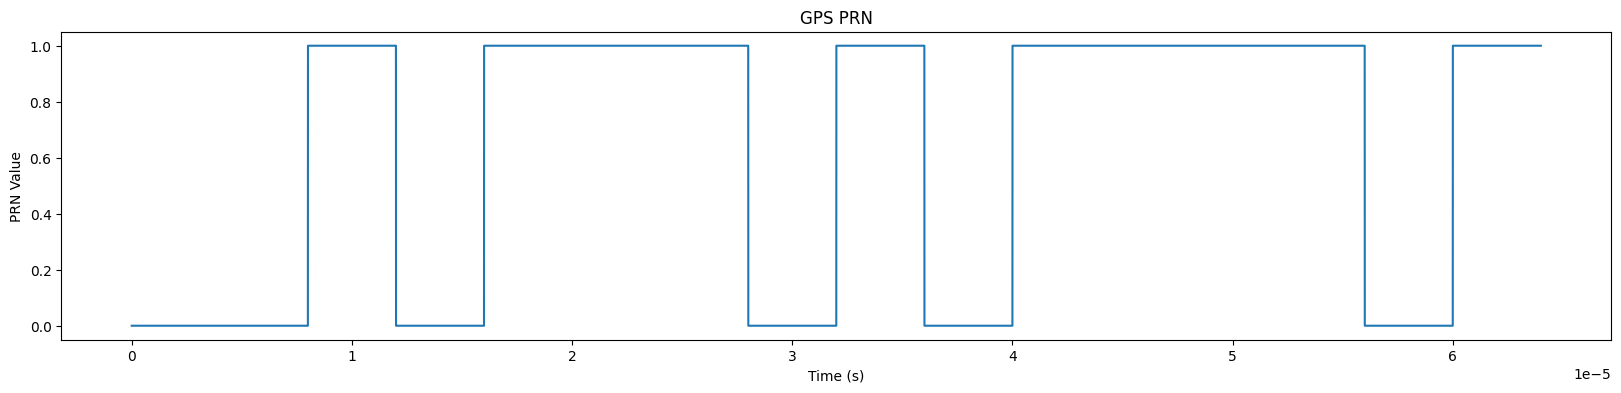

In [11]:
plt.figure(figsize=(20, 4))
plt.plot(time_values, prn_values)
plt.title('GPS PRN')
plt.xlabel('Time (s)')
plt.ylabel('PRN Value')
plt.show()